In [1]:
# 0. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows Korean font
mpl.rcParams['axes.unicode_minus'] = False     # To show minus sign correctly

# 1. 데이터 로드
df_ab = pd.read_csv('../data/ab_data.csv')
df_ct = pd.read_csv('../data/countries.csv')

# 데이터 합치기
df = pd.merge(df_ab, df_ct, on='user_id', how='left')
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294482 entries, 0 to 294481
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294482 non-null  int64 
 1   timestamp     294482 non-null  object
 2   group         294482 non-null  object
 3   landing_page  294482 non-null  object
 4   converted     294482 non-null  int64 
 5   country       294482 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.5+ MB


(   user_id timestamp      group landing_page  converted country
 0   851104   11:48.6    control     old_page          0      US
 1   804228   01:45.2    control     old_page          0      US
 2   661590   55:06.2  treatment     new_page          0      US
 3   853541   28:03.1  treatment     new_page          0      US
 4   864975   52:26.2    control     old_page          1      US,
 None)

In [2]:
# 2. 전처리: 실험 누락/오염 레코드 제거
mask = ((df.group == 'control') & (df.landing_page != 'old_page')) | \
       ((df.group == 'treatment') & (df.landing_page != 'new_page'))
print("오염된 레코드 수:", mask.sum())
df = df.loc[~mask].copy()

# 3. 기본 통계치 확인
print(df.describe(include=[np.number]))
print(df['country'].value_counts())
print(df['group'].value_counts())
print(df['converted'].value_counts())


오염된 레코드 수: 3893
             user_id      converted
count  290589.000000  290589.000000
mean   788004.037913       0.119595
std     91224.393160       0.324488
min    630000.000000       0.000000
25%    709035.000000       0.000000
50%    787992.000000       0.000000
75%    866955.000000       0.000000
max    945999.000000       1.000000
country
US    203624
UK     72466
CA     14499
Name: count, dtype: int64
group
treatment    145315
control      145274
Name: count, dtype: int64
converted
0    255836
1     34753
Name: count, dtype: int64


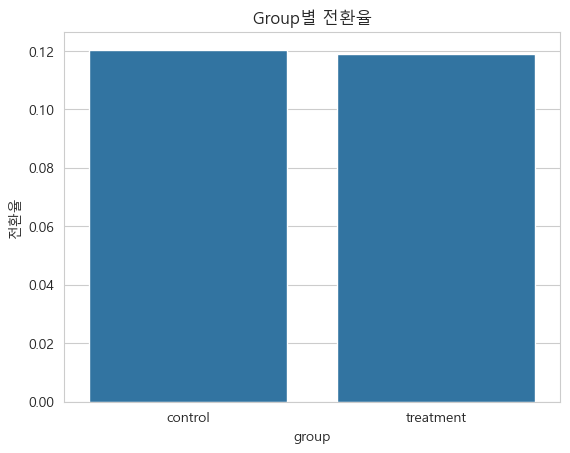

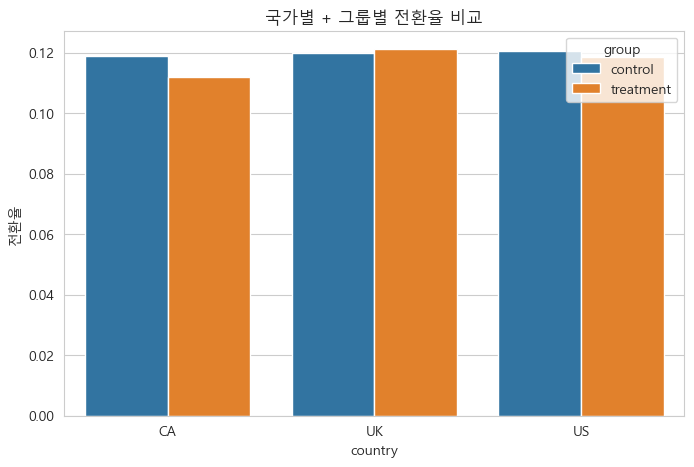

In [3]:
import os
os.makedirs('../outputs/figures', exist_ok=True)

# 4. 전환률 분석
convert_rate = df.groupby('group')['converted'].mean().reset_index()
sns.barplot(data=convert_rate, x='group', y='converted')
plt.title('Group별 전환율')
plt.ylabel('전환율')
plt.savefig('../outputs/figures/1_group_conversion.png')

# 5. 국가별/그룹별 전환율
ct = df.groupby(['country','group'])['converted'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=ct, x='country', y='converted', hue='group')
plt.title('국가별 + 그룹별 전환율 비교')
plt.ylabel('전환율')
plt.savefig('../outputs/figures/2_country_group_conv.png')



In [4]:

# 9. 요약 정보 출력
print("🔎 국가별 샘플 수:")
print(df['country'].value_counts())

print("\n📊 그룹별 전환율 (%):")
print(df.groupby('group')['converted'].mean() * 100)

print("\n🌍 국가+그룹별 전환율 (%):")
country_group_conv = df.groupby(['country', 'group'])['converted'].mean().reset_index()
print(country_group_conv.pivot(index='country', columns='group', values='converted') * 100)

🔎 국가별 샘플 수:
country
US    203624
UK     72466
CA     14499
Name: count, dtype: int64

📊 그룹별 전환율 (%):
group
control      12.038630
treatment    11.880398
Name: converted, dtype: float64

🌍 국가+그룹별 전환율 (%):
group      control  treatment
country                      
CA       11.878300  11.190248
UK       12.002200  12.117100
US       12.062999  11.845979


In [5]:
# 10. EDA 요약 노트
"""
1. 각 그룹의 전환율 차이는?
2. 국가별/그룹별 전환율 차이 존재하는가?
3. 세션 시간 분포 및 군집 차이 유의한가?
4. 이상치 존재 시 제외 처리 또는 보정 필요
"""


'\n1. 각 그룹의 전환율 차이는?\n2. 국가별/그룹별 전환율 차이 존재하는가?\n3. 세션 시간 분포 및 군집 차이 유의한가?\n4. 이상치 존재 시 제외 처리 또는 보정 필요\n'